# Análisis de normalidad con python

Como punto de partidad al trabajar con un set de datos es importante determinar si utilizamos métodos estadísticos paramétricos o no paramétricos. Los métodos estadísticos paramétricos asumen que los datos tiene un distribución conocida, por ejemplo, gaussiana. Si este set de datos no es gaussiana entonces se violan los supuestos de las pruebas estadísticas paramétricas y deben usarse métodos estadísticos no paramétricos.

Si se utilizan métodos que asumen una distribución gaussiana y los datos tienen una distribución diferente, los resultados pueden ser engañosos o incorrectos. Existen una serie de técnicas que puede verificar si los datos tienen una distribución gaussiana o similar para usar las técnicas estándar o si tienen otra distribución usar métodos estadísticos no paramétricos.

Existen diversas estrategias para abordar este análisis:
- Representaciones gráficas
- Test de hipótesis

In [28]:
import pandas as pd
import numpy as np
from numpy.random import seed
from numpy.random import randn
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [41]:
url = ('https://raw.githubusercontent.com/angelomartinezc/estadistica/main/data/Howell.csv')
datos = pd.read_csv(url)
print(datos.info())
datos.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.1 KB
None


,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1


In [30]:
datos = datos[(datos.age > 15) & (datos.male == 0)]
peso = datos['weight']

## Representaciones gráficas

### Histograma

Un gráfico simple y de uso común para verificar rápidamente la distribución de una muestra de datos es el histograma. En el histograma, los datos se dividen en un número predeterminado de grupos llamados bins. Luego, los datos se clasifican en cada contenedor y se retiene el recuento del número de observaciones en cada contenedor.

In [31]:
# media y desviación típica
mu, sigma = stats.norm.fit(peso)

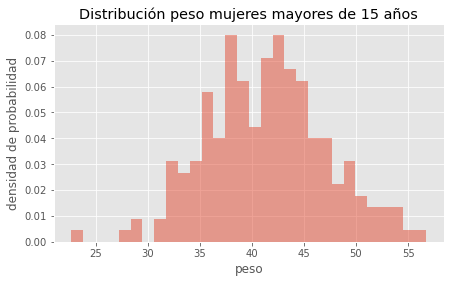

In [32]:
fig, ax = plt.subplots(figsize=(7,4))
ax.hist(x=peso, density=True, bins=30, alpha=0.5)
ax.set_title('Distribución peso mujeres mayores de 15 años')
ax.set_xlabel('peso')
ax.set_ylabel('densidad de probabilidad')
plt.show()

### Gráficos Q-Q

Una gráfica de probabilidad normal, o más específicamente una gráfica cuantil-cuantil (QQ), muestrala distribución de los datos contra la distribución normal esperada.

Para datos distribuidos normalmente, las observaciones deben estar aproximadamente en línea recta. Si los datos no son normales, los puntos forman una curva que se desvía notablemente de una línea recta. Los posibles valores atípicos son puntos en los extremos de la línea, distanciados de la mayor parte de las observaciones.

In [36]:
peso

1      36.485807
2      31.864838
4      41.276872
6      38.243476
8      34.869885
         ...    
529    39.405805
533    40.823280
534    47.031821
537    34.246196
541    54.062497
Name: weight, Length: 198, dtype: float64

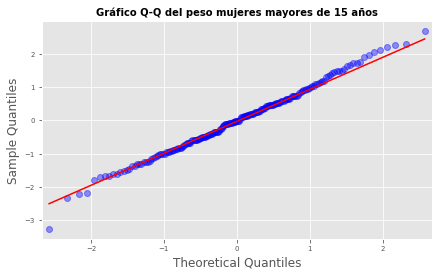

In [40]:
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    peso,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del peso mujeres mayores de 15 años', 
             fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

## Pruebas de contraste numéricas

Los test Shapiro-Wilk test y D'Agostino's K-squared test son dos de los test de hipótesis más empleados para analizar la normalidad. En ambos, se considera como hipótesis nula que los datos proceden de una distribución normal.

Las pruebas suponen que la muestra se extrajo de una distribución gaussiana. Esto se llama hipótesis nula o H0, que habitualmente dice lo contrario de lo que queremos demostrar. Se elige un nivel de umbral llamado alfa (0.05) que se usa para intepretar el valor p.

- p <= 0.05 se rechaza H0, no es normal
- p > 0.5 falla al rechazar H0, normal

Por eso, si la significación es pequeña, podremos descartarla y decir que los datos no son normales. Pero si la significación es alta, simplemente no podremos rechazarla y diremos que no tenemos capacidad para decir que los datos no siguen una normal, lo que no es lo mismo que poder afirmar que son normales.

### Shapiro-Wilk

In [23]:
# Shapiro-Wilk test
stat, p = stats.shapiro(peso)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.996, p=0.924
Sample looks Gaussian (fail to reject H0)


### D'Agostino's K-squared test

In [25]:
# D'Agostino's K-squared test
stat, p = stats.normaltest(peso)
print(f"Statistics = {stat}, p-value = {p}")
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics = 0.19896549779904893, p-value = 0.9053055672511008
Sample looks Gaussian (fail to reject H0)


Ninguno de los test muestra evidencias para rechazar la hipótesis de que los datos se distribuyen de forma normal (p-value muy próximo a 1).

Siempre es conveniente complementar los contrastes numéricos con algún método gráfico para comprobar la normalidad de la variable.

## Ausencia de normalidad

Una vez que sabemos que los datos no son normales, tendremos que tenerlo en cuenta a la hora de describirlos. Si la distribución es muy sesgada no podremos utilizar la media como medida de centralización y tendremos que recurrir a otros estimadores robustos, como la mediana o el otro abanico de medias disponibles para estas situaciones.

Una de las posibles soluciones a este problema sería intentar una transformación de los datos. La más frecuentemente empleada es la transformación logarítmica, muy útil para aproximar a una normal aquellas distribuciones con sesgo positivo (hacia la derecha). 